In [1]:
# project: mp1
# submitter: Ainesh Mohan
# partner: none
# hours: 3

In [2]:
#import statements
import numpy as np
import subprocess
import matplotlib.pyplot as plt
import os
import pandas as pd
import copy
import json
import time

In [3]:
#Q1
type(8/3)

float

In [4]:
#Q2
x = 4
maximum = 15
minimum = 5
error = not (minimum <= x <= maximum) # False if x is inside the minimum-to-maximum range
error

True

In [5]:
#Q3
word = "QUOTIDIAN"
suffix_match = word[-3:].lower() == "ian" # .endswith(...) method not allowed for this question! (practice slicing)
suffix_match

True

In [6]:
def check_sum(x=0,y=0,sum=0):
    return x+y == sum

In [7]:
#Q4
check_sum(0.1, 0.2, 0.3)

False

In [8]:
#Q5
check_sum(-1,1)

True

In [9]:
#Q6
x = 4
if x%2==1:
    status = "odd"
elif x%2==0:
    status = "even"
else:
    status = "non-integer"
status

'even'

In [10]:
nums = [3, 4, 1, 6]
for x in nums:
    print(x)


3
4
1
6


In [11]:
def neg_sum(nums:list):
    sum_vals = 0
    for x in nums:
        if x<0 and sum_vals>-20:
            sum_vals += x
    return sum_vals

In [12]:
#Q7
neg_sum(nums)

0

In [13]:
#Q8
neg_sum([-5, 1, -11, -6, 15, -1, 8, 2])

-22

In [14]:
header = ["A", "B", "C"]

coord1 = {"x": 8, "y": 5}
coord2 = {"x": 9, "y": 2, "z" : 4}
coord3 = {"x": 3, "y": 1, "z" : 7}

rows = [
    [1, 6, 7, 8, coord1],
    [3, 4, 9, coord2],
    [5, 2, coord3],
]

In [15]:
#Q9
coord3["w"] = 6
rows

[[1, 6, 7, 8, {'x': 8, 'y': 5}],
 [3, 4, 9, {'x': 9, 'y': 2, 'z': 4}],
 [5, 2, {'x': 3, 'y': 1, 'z': 7, 'w': 6}]]

In [16]:
#Q10
rows[0][-1]["x"]

8

In [17]:
#Q11
v2 = copy.deepcopy(rows)
v2[0] = 404    # first change

v2 = copy.copy(rows)
v2[1][1] = 404 # second change

rows

[[1, 6, 7, 8, {'x': 8, 'y': 5}],
 [3, 404, 9, {'x': 9, 'y': 2, 'z': 4}],
 [5, 2, {'x': 3, 'y': 1, 'z': 7, 'w': 6}]]

In [18]:
#Q12
ans = 0
for i in range(len(header)):
    ans +=rows[i][header.index("B")]
ans

412

In [19]:
#Q13
rows.sort(key=lambda row: row[header.index("B")])
rows

[[5, 2, {'x': 3, 'y': 1, 'z': 7, 'w': 6}],
 [1, 6, 7, 8, {'x': 8, 'y': 5}],
 [3, 404, 9, {'x': 9, 'y': 2, 'z': 4}]]

In [20]:
f = open("usd.json")
data = json.load(f)
f.close()

In [21]:
#Q14
exchange_rate = data['cad']["rate"]
usd = 1000
cad = round(exchange_rate*usd,2)
cad

1349.91

In [22]:
def divide(x,y):
    try:
        return x/y
    except ZeroDivisionError:
        return float("nan")

In [23]:
#Q15
divide(5,2)

2.5

In [24]:
#Q16
divide(0,0)

nan

In [25]:
#Q17
years = {}
for file_name in os.listdir("home-computers"):
    temp = file_name.split(".")
    if temp[2] == "csv":
        years[int(temp[0][-4:])]=pd.read_csv("./home-computers/"+file_name,skiprows = [0], index_col = "Geographic Area Name")
sorted(list(years.keys()))

[2017, 2018, 2019, 2020, 2021]

In [26]:
#Q18
df = years[2021]
df.at["Wisconsin","Estimate!!Total"]

2401818

In [27]:
#Q19
df["Estimate!!Total!!No Computer"].sum()

8902093

In [28]:
#Q20
col = df["Margin of Error!!Total!!No Computer"] / df["Estimate!!Total!!No Computer"]
max_error = col.max()
max_error

0.07836701790752577

In [29]:
#Q21
states = ["Illinois", "Indiana", "Iowa", "Michigan", "Minnesota", "Wisconsin"]
no_comp_perc = {}
for i in states:
    no_comp_perc[i] = ((df.loc[i]["Estimate!!Total!!No Computer"])/(df.loc[i]["Estimate!!Total"]))*100
no_comp_perc

{'Illinois': 7.351100500886871,
 'Indiana': 8.300995843439395,
 'Iowa': 8.302263591069158,
 'Michigan': 7.579772219831928,
 'Minnesota': 6.1777398950248985,
 'Wisconsin': 8.029750797104526}

<AxesSubplot:xlabel='Geographic Area Name', ylabel='% of Households w/o Computers'>

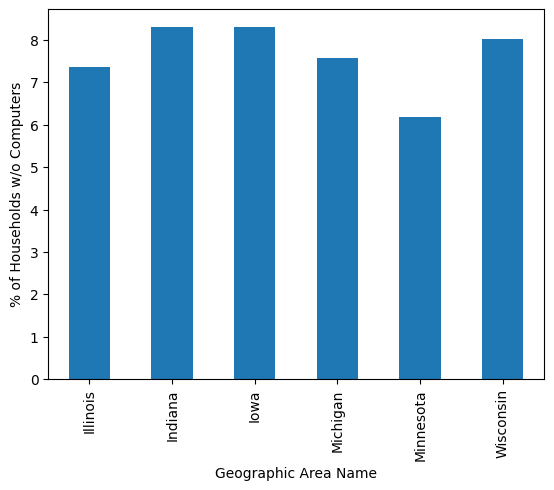

In [30]:
#Q22
pd.Series(no_comp_perc).plot.bar(xlabel = "Geographic Area Name", ylabel = "% of Households w/o Computers")

<AxesSubplot:xlabel='Year', ylabel='WI Households without Computers (thousands)'>

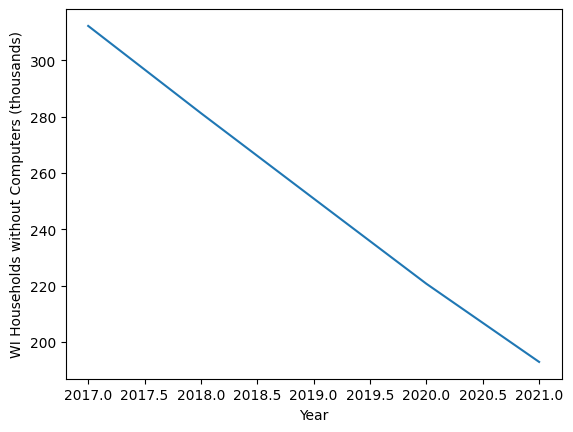

In [31]:
#Q23
wisc_data = {}
for i in range(2017,2022):
    temp = years[i]
    wisc_data[i] = temp.loc["Wisconsin","Estimate!!Total!!No Computer"]/1000
pd.Series(wisc_data).plot.line(xlabel = "Year", ylabel = "WI Households without Computers (thousands)")

Text(0, 0.5, 'Smartphones (millions)')

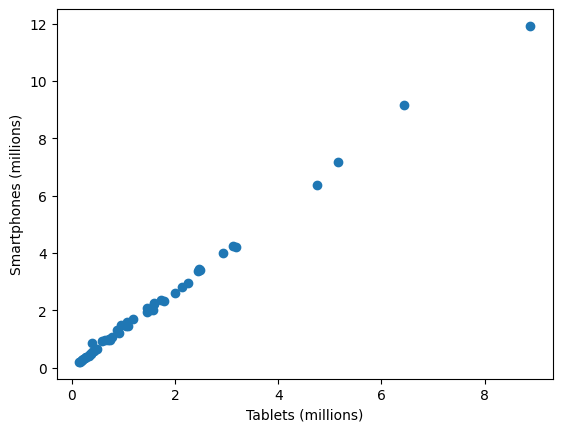

In [32]:
#Q24
col_smartphones = df["Estimate!!Total!!Has one or more types of computing devices!!Smartphone"] / 1e6
col_tablets = df["Estimate!!Total!!Has one or more types of computing devices!!Tablet or other portable wireless computer"] / 1e6

plt.scatter(col_tablets, col_smartphones)
plt.xlabel("Tablets (millions)")
plt.ylabel("Smartphones (millions)")

In [33]:
#Q25
log_output = subprocess.check_output("git checkout main; git log", cwd = "flask", shell = True).decode().split("\n")
ans = ""
for i in range(len(log_output)):
    if log_output[i].startswith("commit"):
        ans = log_output[i]
        break
ans

Already on 'main'


'commit 660994efc761efdfd49ca442b73f6712dc77b6cf'

In [34]:
#Q26
list_of_commits = subprocess.check_output("git checkout main; git log", cwd = "flask", shell = True).decode().split("\n")[::-1]
counter = 0
output = []
while len(output) < 10:
    temp = list_of_commits[counter]
    if temp.startswith("commit"):
        output.append(temp[7:])
    counter += 1

output[::-1]

Already on 'main'


['a9d4ea81da28ee9c894bf9d45adc4cfa9d52fddc',
 '727c701686c18c4a27ca523eb0c5862d497be24e',
 '4edec48b74dbb9d571e927b69b24c30ec0624975',
 '625eba4bb403296a8bbc1e72cc9cf4a5126f6c02',
 '4aa76212d1be9b17a57249549c2a73fb10b6cda8',
 '3b36bef2e6165bb4dad73d17f23ee1879e99f497',
 '44b42e0fbd93d86e0f4e929bda8e5fb63e81035d',
 '4ec7d2a0d8eac4f915dc0d38a886cd57045bb0c4',
 'b15ad394279fc3b7f998fa56857f334a7c0156f6',
 '33850c0ebd23ae615e6823993d441f46d80b1ff0']

In [35]:
#Q27
list_of_commits = subprocess.check_output("git checkout main; git log", cwd = "flask", shell = True).decode().split("\n")[::-1]
counter = 0
output = []
while len(output) < 100:
    temp = list_of_commits[counter]
    if temp.startswith("commit"):
        output.append(temp[7:])
    counter += 1
    # print(output)

output_100 = output[99]
subprocess.check_output("git checkout "+output_100, cwd = "flask", shell = True)
file = open("flask/README")
data = file.read()
file.close()
data

Already on 'main'
Note: switching to 'f878919753a909e45b2d5448aa175f4f9129ff24'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at f8789197 With -> with in headline


"\n                          // Flask //\n\n         because sometimes a pocket knife is not enough\n\n\n    ~ What is Flask?\n\n      Flask is a microframework for Python based on Werkzeug\n      and Jinja2.  It's intended for small scale applications\n      and was development with best intentions in mind.\n\n    ~ Is it ready?\n\n      A preview release is out now, and I'm hoping for some\n      input about what you want from a microframework and\n      how it should look like.  Consider the API to slightly\n      improve over time.\n\n    ~ What do I need?\n\n      Jinja 2.4 and Werkzeug 0.6.1.  `easy_install` will\n      install them for you if you do `easy_install Flask==dev`.\n      I encourage you to use a virtualenv.  Check the docs for\n      complete installation and usage instructions.\n\n    ~ Where are the docs?\n\n      Go to http://flask.pocoo.org/ for a prebuild version of\n      the current documentation.  Otherwise build them yourself\n      from the sphinx sources i

In [36]:
#Q28
list_of_commits = subprocess.check_output("git checkout main; git log", cwd="flask", shell=True).decode().split("\n")

output = {}
for temp in list_of_commits:
    if temp.startswith("    Merge pull request") and '/' in temp:
        user = temp[temp.index('from') + 5:temp.index('/')]  # Adjusted slicing indices
        output[user] = output.get(user, 0) + 1

greater_than_10 = {key: value for key, value in output.items() if value >= 10}

greater_than_10

Previous HEAD position was f8789197 With -> with in headline
Switched to branch 'main'


{'pallets': 204,
 'pgjones': 14,
 'greyli': 42,
 'ThiefMaster': 11,
 'davidism': 45,
 'untitaker': 20,
 'ThomasWaldmann': 13,
 'SimonSapin': 11}

In [37]:
#Q29
try:
    msg = subprocess.check_output(["pip3", "instal"], stderr=subprocess.STDOUT).decode()
except subprocess.CalledProcessError as e:
    msg = e.output.decode()
msg

'ERROR: unknown command "instal" - maybe you meant "install"\n'

<AxesSubplot:xlabel='Rows', ylabel='Milliseconds'>

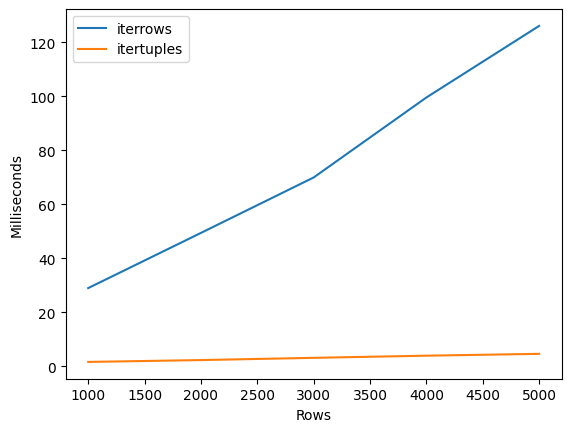

In [38]:
#Q30
def rand_df(rows):
    return pd.DataFrame(np.random.randint(10, size=(rows, 5)),
                        columns=["A", "B", "C", "D", "E"],
                        index=[f"r{i}" for i in range(1, rows+1)])
times_df = pd.DataFrame()
for i in range(1000,6000,1000):
    df = rand_df(i)
    
    t0 = time.time()
    for row in df.iterrows():
        pass
    t1 = time.time()
    
    t2 = time.time()
    for tup in df.itertuples():
        pass
    t3 = time.time()
    times_df.at[i,"iterrows"] = (t1-t0)*1000
    times_df.at[i,"itertuples"] = (t3-t2)*1000


times_df.plot.line(xlabel = "Rows", ylabel = "Milliseconds")

<AxesSubplot:xlabel='Rows', ylabel='Milliseconds'>

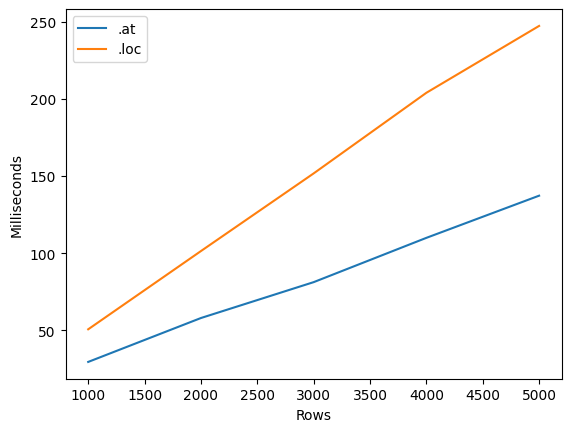

In [39]:
#Q31
times_df = pd.DataFrame()
for i in range(1000,6000,1000):
    df = rand_df(i)
    total = 0
    
    t0 = time.time()
    
    for idx in df.index:
        for col in df.columns:
            total += df.at[idx, col]

    t1 = time.time()
    
    total = 0
    t2 = time.time()
    
    for idx in df.index:
        for col in df.columns:
            total += df.loc[idx,col]
    t3 = time.time()
    
    times_df.at[i,".at"] = (t1-t0)*1000
    times_df.at[i,".loc"] = (t3-t2)*1000


times_df.plot.line(xlabel = "Rows", ylabel = "Milliseconds")

<AxesSubplot:xlabel='Rows', ylabel='Milliseconds'>

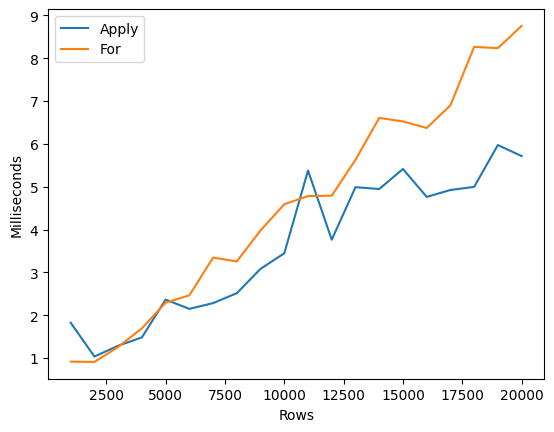

In [40]:
#Q32
def laugh(x):
    return "qwerty" * x


times_df = pd.DataFrame()
for i in range(1000,21000,1000):
    df = rand_df(i)
    
    total = 0
    t0 = time.time()
    result = df["A"].apply(laugh).tolist()
    t1 = time.time()
    
    total = 0
    t2 = time.time()
    result = []
    for val in df["A"]:
        result.append(laugh(val))
    t3 = time.time()
    
    times_df.at[i,"Apply"] = (t1-t0)*1000
    times_df.at[i,"For"] = (t3-t2)*1000


times_df.plot.line(xlabel = "Rows", ylabel = "Milliseconds")